<a href="https://colab.research.google.com/github/yadavLakshay/ml_projects/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Loaing Data

In [2]:
car_data = pd.read_csv('/content/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking dist of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding categorical data

In [7]:
# encoding fuel type col
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding seller type col
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding transmission col
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_data['Selling_Price']

In [11]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting training and test data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

Model training using Linear Regression

In [21]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

Evaluation

In [16]:
#pred on training data
training_data_pred = model.predict(x_train)

# r^2 error
error_score = metrics.r2_score(y_train, training_data_pred)
print("R squared error : ", error_score)

R squared error :  0.8799451660493711


Visualizing actual VS predicted price

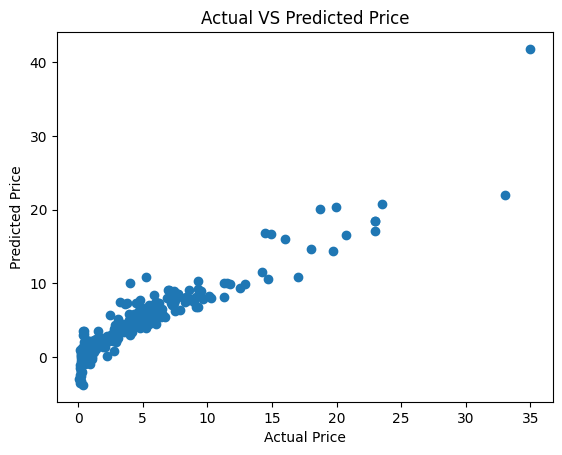

In [18]:
# training data
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Price')
plt.show()

In [19]:
#pred on testing data
testing_data_pred = model.predict(x_test)

# r^2 error
error_score = metrics.r2_score(y_test, testing_data_pred)
print("R squared error : ", error_score)

R squared error :  0.8365766715027051


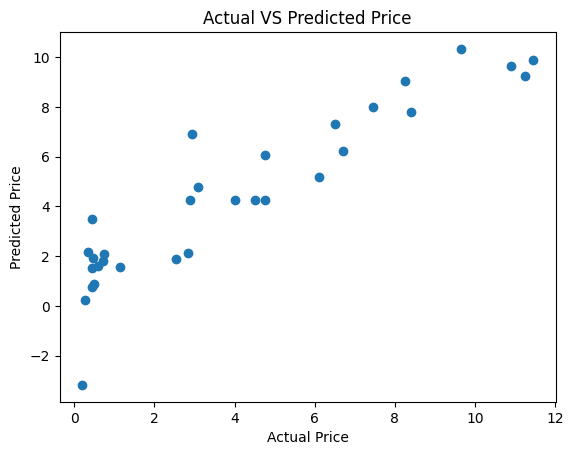

In [20]:
# testing data
plt.scatter(y_test, testing_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Price')
plt.show()

Model training using Lasso Regression

In [22]:
model_lasso = Lasso()

In [23]:
model_lasso.fit(x_train, y_train)

Lasso()

Evaluation

In [24]:
#pred on training data
training_data_pred = model_lasso.predict(x_train)

# r^2 error
error_score = metrics.r2_score(y_train, training_data_pred)
print("R squared error : ", error_score)

R squared error :  0.8427856123435794


Visualizing actual VS predicted price

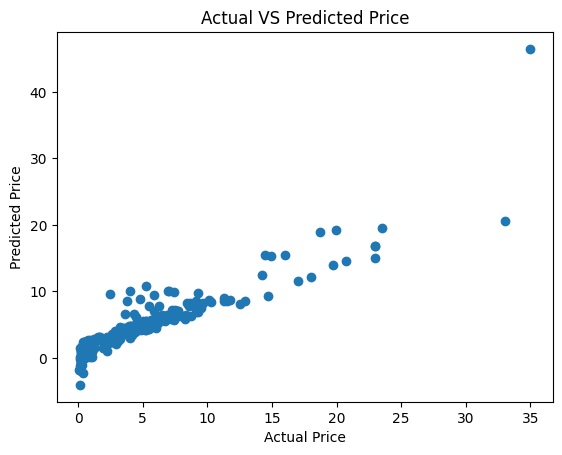

In [25]:
# training data
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Price')
plt.show()

In [26]:
#pred on testing data
testing_data_pred = model_lasso.predict(x_test)

# r^2 error
error_score = metrics.r2_score(y_test, testing_data_pred)
print("R squared error : ", error_score)

R squared error :  0.8709167941173195


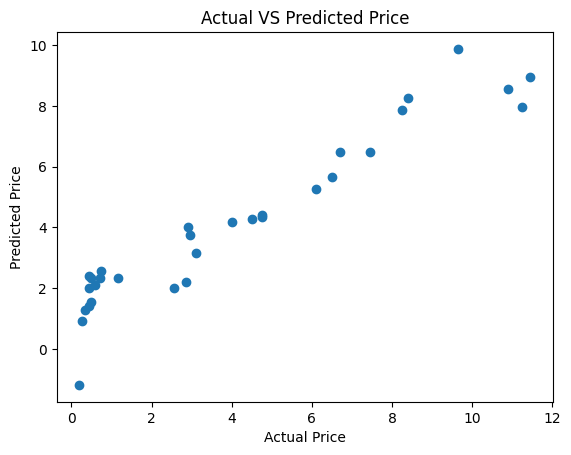

In [27]:
# testing data
plt.scatter(y_test, testing_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Price')
plt.show()